In [1]:
"""
Team Gamma
COMP262
"""

'\nTeam Gamma\nCOMP262\n'

In [2]:
import os
import pandas as pd

In [3]:
current_path = os.getcwd()
data_name = 'Industrial_and_Scientific_5.json'
data_path = current_path + "/" + data_name

In [4]:
data = pd.read_json(data_path,orient='records',lines=True)

In [5]:
"""
1. Dataset data exploration: List the main finding of the dataset. Be thorough and creative.
For example, look at:
a. Counts, averages
"""

'\n1. Dataset data exploration: List the main finding of the dataset. Be thorough and creative.\nFor example, look at:\na. Counts, averages\n'

In [6]:
data.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"11 27, 2017",A1JB7HFWHRYHT7,B0000223SI,{'Size:': ' 1-(Pack)'},Alex W.,This worked really well for what I used it for...,Couldn't have been happier with it's performance,1511740800,NaN,NaN
1,5,True,"11 4, 2017",A2FCLJG5GV8SD6,B0000223SI,{'Size:': ' 1-(Pack)'},Randall Harris,Fast cutting and good adheasive.,Good paper.,1509753600,NaN,NaN
2,5,False,"10 27, 2017",A3IT9B33NWYQSL,B0000223SI,{'Size:': ' 1-(Pack)'},A. C.,Worked great for my lapping bench. I would li...,Handy!,1509062400,NaN,NaN
3,4,True,"01 13, 2018",AUL5LCV4TT73P,B0000223SK,{'Size:': ' 1-Pack'},TnT,As advertised,As advertised,1515801600,NaN,NaN
4,5,True,"10 7, 2017",A1V3I3L5JKO7TM,B0000223SK,{'Size:': ' 1-Pack'},John Jones,seems like a pretty good value as opposed to b...,seems like a pretty good value as opposed to b...,1507334400,NaN,NaN


In [7]:
data.describe()

,overall,unixReviewTime
count,77071.000000,7.707100e+04
mean,4.524062,1.454857e+09
std,0.949668,4.559407e+07
min,1.000000,1.051402e+09
25%,4.000000,1.427674e+09
50%,5.000000,1.459469e+09
75%,5.000000,1.486944e+09
max,5.000000,1.538093e+09


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77071 entries, 0 to 77070
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         77071 non-null  int64 
 1   verified        77071 non-null  bool  
 2   reviewTime      77071 non-null  object
 3   reviewerID      77071 non-null  object
 4   asin            77071 non-null  object
 5   style           36037 non-null  object
 6   reviewerName    77044 non-null  object
 7   reviewText      77060 non-null  object
 8   summary         77061 non-null  object
 9   unixReviewTime  77071 non-null  int64 
 10  vote            9620 non-null   object
 11  image           1719 non-null   object
dtypes: bool(1), int64(2), object(9)
memory usage: 6.5+ MB


In [9]:
# b. Distribution of the number of reviews across products

In [10]:
num_across_products = data['asin'].value_counts()

In [11]:
num_across_products.head(10)

asin
B0013BKDO8    1229
B00DRALJ28     910
B0001MSC84     650
B000EJUBBU     305
B001766LZO     241
B000ZTEPWU     210
B0002EQU6C     205
B00837ZGRY     204
B00DMI632G     203
B001769IRW     191
Name: count, dtype: int64

In [12]:
len(num_across_products)

5334

In [13]:
num_across_products.index

Index(['B0013BKDO8', 'B00DRALJ28', 'B0001MSC84', 'B000EJUBBU', 'B001766LZO',
       'B000ZTEPWU', 'B0002EQU6C', 'B00837ZGRY', 'B00DMI632G', 'B001769IRW',
       ...
       'B000YQIR4Q', 'B01B5BUUWK', 'B004WS617M', 'B000XJO3KQ', 'B000X608M6',
       'B000WLFRXC', 'B000GG7UAG', 'B000W24OX0', 'B01D9CSGLK', 'B00137WAXY'],
      dtype='object', name='asin', length=5334)

In [14]:
num_across_products.values

array([1229,  910,  650, ...,    1,    1,    1])

In [15]:
max(num_across_products.values)

1229

In [16]:
min(num_across_products.values)

1

In [17]:
from matplotlib import pyplot as plt
import numpy as np

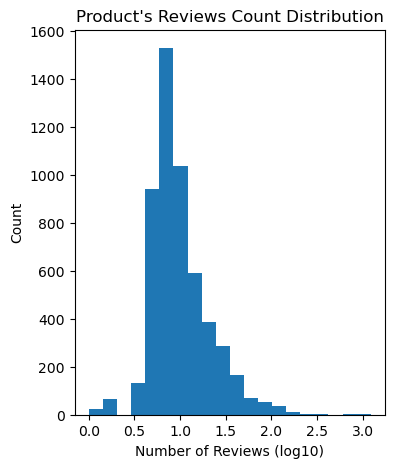

In [18]:
plt.figure(figsize=(4, 5))
plt.hist(np.log10(num_across_products.values),bins=20)
plt.xlabel('Number of Reviews (log10)')
plt.ylabel('Count')
plt.title("Product's Reviews Count Distribution")
plt.show()

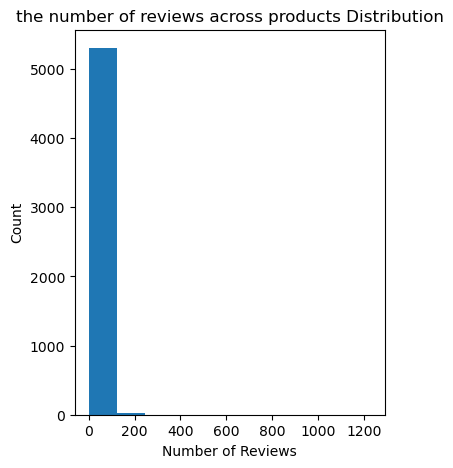

In [19]:
plt.figure(figsize=(4, 5))
plt.hist(num_across_products.values)
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.title("the number of reviews across products Distribution")
plt.show()

In [20]:
# c. Distribution of the number of reviews per product

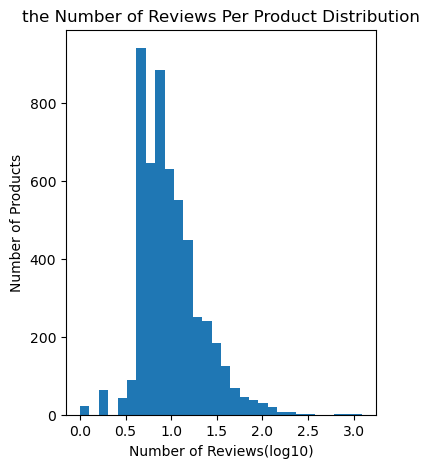

In [21]:
plt.figure(figsize=(4, 5))
plt.hist(np.log10(num_across_products.values), bins=30)
plt.xlabel('Number of Reviews(log10)')
plt.ylabel('Number of Products')
plt.title('the Number of Reviews Per Product Distribution')
plt.show()

In [22]:
# d. Distribution of reviews per user

In [23]:
num_reviews_user = data['reviewerID'].value_counts()
print(num_reviews_user)

reviewerID
A3L1VJMHFWONCB    99
A2W19IAPS7ZSDK    64
A2JZUUAAK3HNHS    61
A3OXHLG6DIBRW8    55
A2J2MQ45S3N25N    47
                  ..
A2FGD486F64BYM     4
A1MRD8YEY0IVCB     4
A3A2555BBGXNMI     4
A15CSHMACOQ70J     3
A36UN90WLZ5X10     2
Name: count, Length: 11041, dtype: int64


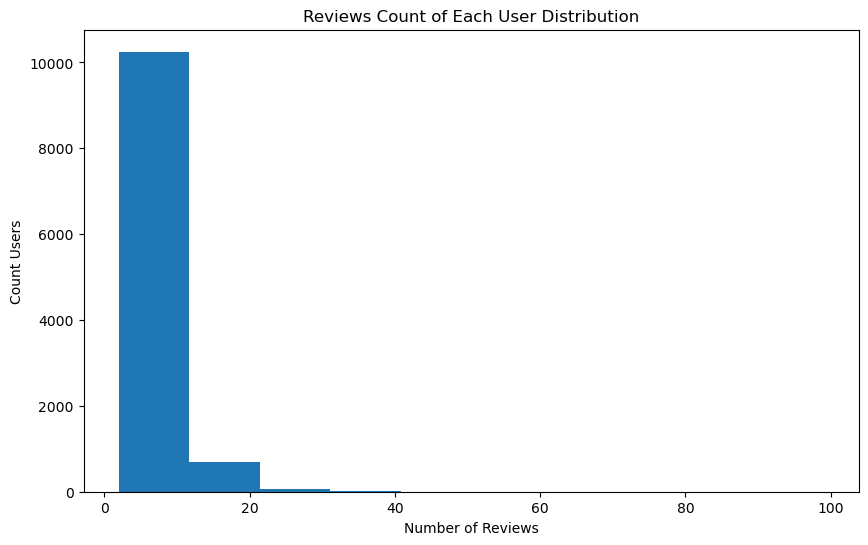

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(num_reviews_user.values)
plt.xlabel('Number of Reviews')
plt.ylabel('Count Users')
plt.title('Reviews Count of Each User Distribution')
plt.show()

In [25]:
# e. Review lengths and outliers

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77071 entries, 0 to 77070
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         77071 non-null  int64 
 1   verified        77071 non-null  bool  
 2   reviewTime      77071 non-null  object
 3   reviewerID      77071 non-null  object
 4   asin            77071 non-null  object
 5   style           36037 non-null  object
 6   reviewerName    77044 non-null  object
 7   reviewText      77060 non-null  object
 8   summary         77061 non-null  object
 9   unixReviewTime  77071 non-null  int64 
 10  vote            9620 non-null   object
 11  image           1719 non-null   object
dtypes: bool(1), int64(2), object(9)
memory usage: 6.5+ MB


In [27]:
nan_rows = data[data['reviewText'].isna()]
nan_indices = nan_rows.index.tolist()
print(len(nan_indices))
print(nan_indices)

11
[603, 14747, 18813, 21401, 35713, 38271, 41986, 41987, 43997, 55969, 56410]


In [28]:
data_without_nan = data.fillna('')

In [29]:
data_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77071 entries, 0 to 77070
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         77071 non-null  int64 
 1   verified        77071 non-null  bool  
 2   reviewTime      77071 non-null  object
 3   reviewerID      77071 non-null  object
 4   asin            77071 non-null  object
 5   style           77071 non-null  object
 6   reviewerName    77071 non-null  object
 7   reviewText      77071 non-null  object
 8   summary         77071 non-null  object
 9   unixReviewTime  77071 non-null  int64 
 10  vote            77071 non-null  object
 11  image           77071 non-null  object
dtypes: bool(1), int64(2), object(9)
memory usage: 6.5+ MB


In [30]:
review_lenths = []

for review in data_without_nan["reviewText"]:
    len_review = len(review.split())
    review_lenths.append(len_review)

In [31]:
max(review_lenths)

5966

In [32]:
min(review_lenths)

0

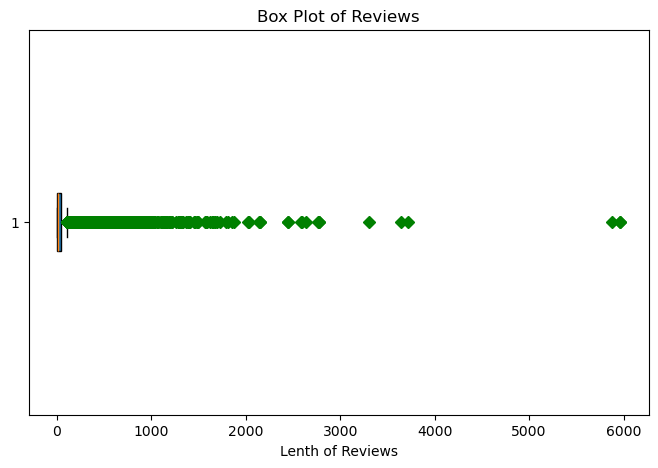

In [33]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.boxplot(review_lenths, vert=False, patch_artist=True, sym='gD')
plt.xlabel("Lenth of Reviews")
plt.title("Box Plot of Reviews")
plt.show()

In [34]:
# f. Analyze lengths

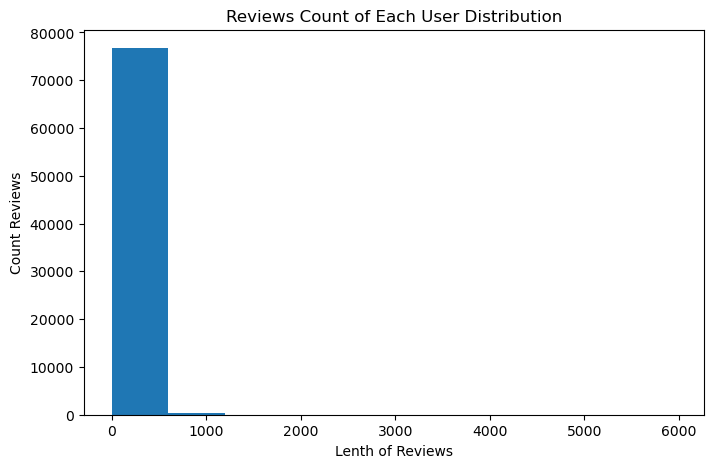

In [35]:
plt.figure(figsize=(8, 5))
plt.hist(review_lenths)
plt.xlabel('Lenth of Reviews')
plt.ylabel('Count Reviews')
plt.title('Reviews Count of Each User Distribution')
plt.show()

In [36]:
np.mean(review_lenths)

44.16502964798692

In [37]:
from collections import Counter

In [38]:
print(Counter(review_lenths))

Counter({2: 6636, 1: 3859, 4: 3314, 3: 2960, 5: 2860, 6: 2679, 7: 2327, 8: 1969, 9: 1760, 10: 1547, 11: 1546, 12: 1375, 20: 1214, 14: 1184, 13: 1179, 15: 1169, 21: 1143, 16: 1073, 22: 1042, 17: 962, 18: 951, 23: 932, 24: 918, 19: 897, 25: 831, 28: 784, 27: 732, 26: 721, 30: 680, 29: 680, 31: 655, 33: 626, 32: 611, 34: 590, 36: 554, 35: 503, 37: 487, 40: 480, 38: 480, 39: 477, 41: 448, 43: 429, 45: 427, 42: 423, 46: 406, 44: 400, 47: 378, 49: 368, 48: 354, 52: 322, 50: 322, 51: 321, 59: 307, 53: 299, 55: 291, 56: 277, 54: 275, 57: 269, 63: 263, 61: 263, 62: 252, 58: 251, 64: 245, 60: 240, 66: 235, 65: 229, 70: 226, 67: 218, 69: 215, 72: 212, 73: 201, 74: 197, 68: 197, 71: 184, 78: 184, 83: 176, 77: 175, 76: 170, 75: 163, 80: 159, 81: 153, 82: 151, 89: 148, 86: 147, 93: 143, 88: 143, 84: 142, 85: 138, 90: 137, 79: 137, 91: 137, 87: 134, 98: 131, 92: 128, 96: 125, 95: 118, 94: 117, 103: 117, 102: 116, 100: 115, 99: 110, 101: 109, 105: 106, 97: 96, 106: 93, 107: 92, 104: 89, 111: 88, 114: 

In [39]:
from scipy import stats

stats.mode(review_lenths)

ModeResult(mode=2, count=6636)

In [40]:
# g. Check for duplicates

In [41]:
data_without_nan['reviewText']

0        This worked really well for what I used it for...
1                         Fast cutting and good adheasive.
2        Worked great for my lapping bench.  I would li...
3                                            As advertised
4        seems like a pretty good value as opposed to b...
                               ...                        
77066    So far it has worked like a champ. Great solut...
77067    Great quality solid state relay. I used this s...
77068    Came with everything needed to install in my M...
77069    Installed a month ago in my Monoprice Maker Se...
77070    This releaves the mothere board of the current...
Name: reviewText, Length: 77071, dtype: object

In [42]:
duplicated_bool = data_without_nan.duplicated(subset='reviewText', keep=False)

In [43]:
Counter(duplicated_bool)

Counter({False: 51564, True: 25507})

In [44]:
duplicated_bool_product_reviews = data_without_nan.duplicated(subset=['reviewText','asin'], keep=False)

In [45]:
Counter(duplicated_bool_product_reviews)

Counter({False: 68079, True: 8992})

In [46]:
duplicated_bool_p_r_ID = data_without_nan.duplicated(subset=['reviewText','asin','reviewerID'], keep=False)

In [47]:
Counter(duplicated_bool_p_r_ID)

Counter({False: 68473, True: 8598})

In [48]:
duplicated_bool_p_r_ID_o = data_without_nan.duplicated(subset=['reviewText','asin','reviewerID','overall'], keep=False)

In [49]:
Counter(duplicated_bool_p_r_ID_o)

Counter({False: 68477, True: 8594})

In [50]:
duplicated_bool_p_r_ID_o_n = data_without_nan.duplicated(subset=['reviewText','asin','reviewerID','overall','reviewerName'], keep=False)

In [51]:
Counter(duplicated_bool_p_r_ID_o_n)

Counter({False: 68477, True: 8594})

In [52]:
duplicated_bool_p_r_ID_o_n_rt = data_without_nan.duplicated(subset=['reviewText','asin','reviewerID','overall','reviewerName','reviewTime'], keep=False)

In [53]:
Counter(duplicated_bool_p_r_ID_o_n_rt)

Counter({False: 68493, True: 8578})

In [54]:
duplicated_bool_p_r_ID_o_n_rt_urt = data_without_nan.duplicated(subset=['reviewText','asin','reviewerID','overall','reviewerName','reviewTime','unixReviewTime'], keep=False)

In [55]:
Counter(duplicated_bool_p_r_ID_o_n_rt_urt)

Counter({False: 68493, True: 8578})

In [56]:
duplicated_bool_p_r_ID_o_n_rt_urt_v = data_without_nan.duplicated(subset=['reviewText','asin','reviewerID','overall','reviewerName','reviewTime','unixReviewTime','verified'], keep=False)

In [57]:
Counter(duplicated_bool_p_r_ID_o_n_rt_urt_v)

Counter({False: 68497, True: 8574})

In [58]:
"""
2. Text basic pre-processing:
a.Label your data based on the value of “rating of the product” i.e. as follows:
i.Ratings 4,5: Positive
ii.Rating 3: Neutral
iii.Ratings 1,2: Negative
"""

'\n2. Text basic pre-processing:\na.Label your data based on the value of “rating of the product” i.e. as follows:\ni.Ratings 4,5: Positive\nii.Rating 3: Neutral\niii.Ratings 1,2: Negative\n'

In [59]:
data_with_label = data

In [60]:
label= []

for i,row in data_with_label.iterrows():
    if row['overall'] >= 4.0:
        label = "Positive"
    elif row['overall'] <= 1.0:
        label = "Negative"
    else:
        label = "Neutral"
        
data_with_label['label'] = label

In [61]:
data_with_label.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,label
0,5,True,"11 27, 2017",A1JB7HFWHRYHT7,B0000223SI,{'Size:': ' 1-(Pack)'},Alex W.,This worked really well for what I used it for...,Couldn't have been happier with it's performance,1511740800,NaN,NaN,Positive
1,5,True,"11 4, 2017",A2FCLJG5GV8SD6,B0000223SI,{'Size:': ' 1-(Pack)'},Randall Harris,Fast cutting and good adheasive.,Good paper.,1509753600,NaN,NaN,Positive
2,5,False,"10 27, 2017",A3IT9B33NWYQSL,B0000223SI,{'Size:': ' 1-(Pack)'},A. C.,Worked great for my lapping bench. I would li...,Handy!,1509062400,NaN,NaN,Positive
3,4,True,"01 13, 2018",AUL5LCV4TT73P,B0000223SK,{'Size:': ' 1-Pack'},TnT,As advertised,As advertised,1515801600,NaN,NaN,Positive
4,5,True,"10 7, 2017",A1V3I3L5JKO7TM,B0000223SK,{'Size:': ' 1-Pack'},John Jones,seems like a pretty good value as opposed to b...,seems like a pretty good value as opposed to b...,1507334400,NaN,NaN,Positive


In [62]:
# Chose the appropriate columns for your sentiment analyzer. (Give this some thought) and mention in your report why you chose each column.

In [63]:
data_for_sentiment_analyzer = data_with_label[['reviewText','summary','label']]

In [64]:
data_for_sentiment_analyzer.head()

,reviewText,summary,label
0,This worked really well for what I used it for...,Couldn't have been happier with it's performance,Positive
1,Fast cutting and good adheasive.,Good paper.,Positive
2,Worked great for my lapping bench. I would li...,Handy!,Positive
3,As advertised,As advertised,Positive
4,seems like a pretty good value as opposed to b...,seems like a pretty good value as opposed to b...,Positive


In [65]:
#c.Check for outliers

In [66]:
#3. Study the below three Lexicons packages and choose two for model building justify why you chose them:
# VADR + TextBlob